In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
dataset=pd.read_csv("E:/Hadoop Softwares/Skillathon/Assigments/pandas dataset/Linear regression/datasets_diabetes.csv")

In [116]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [115]:
dataset.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144.0,72.0,27.00000,228.000000,33.9,0.255,40,0
96,2,92.0,62.0,28.00000,155.548223,31.6,0.130,24,0
97,1,71.0,48.0,18.00000,76.000000,20.4,0.323,22,0
98,6,93.0,50.0,30.00000,64.000000,28.7,0.356,23,0


In [44]:
#Converting Ten to 10 numeric
dataset["Pregnancies"]=dataset["Pregnancies"].replace(["Ten"],'10')


In [45]:
dataset.shape

(768, 9)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null object
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [47]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [48]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [117]:
dataset.values

array([['6', 148.0, 72.0, ..., 0.627, 50, 1],
       ['1', 85.0, 66.0, ..., 0.35100000000000003, 31, 0],
       ['8', 183.0, 64.0, ..., 0.672, 32, 1],
       ...,
       ['5', 121.0, 72.0, ..., 0.245, 30, 0],
       ['1', 126.0, 60.0, ..., 0.349, 47, 1],
       ['1', 93.0, 70.0, ..., 0.315, 23, 0]], dtype=object)

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null object
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


In [119]:
dataset.corr

<bound method DataFrame.corr of     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0             6    148.0           72.0       35.00000  155.548223  33.6   
1             1     85.0           66.0       29.00000  155.548223  26.6   
2             8    183.0           64.0       29.15342  155.548223  23.3   
3             1     89.0           66.0       23.00000   94.000000  28.1   
4             0    137.0           40.0       35.00000  168.000000  43.1   
..          ...      ...            ...            ...         ...   ...   
763          10    101.0           76.0       48.00000  180.000000  32.9   
764           2    122.0           70.0       27.00000  155.548223  36.8   
765           5    121.0           72.0       23.00000  112.000000  26.2   
766           1    126.0           60.0       29.15342  155.548223  30.1   
767           1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0        

In [120]:
total_count=len(dataset["Outcome"])
Diabetic_count=len(dataset.loc[dataset['Outcome'] == 1])
Non_Diabetic_count=len(dataset.loc[dataset['Outcome'] == 0])

print("total number of diabetes_outcomes is {}".format(total_count))
print("total number of Diabetic_count is {}".format(Diabetic_count))
print("total number of Non_Diabetic_count is {}".format(Non_Diabetic_count))

total number of diabetes_outcomes is 768
total number of Diabetic_count is 268
total number of Non_Diabetic_count is 500


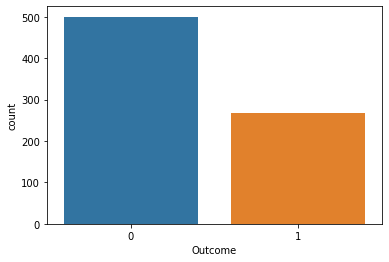

In [121]:
#EDA 
sns.countplot(x = 'Outcome',data = dataset)

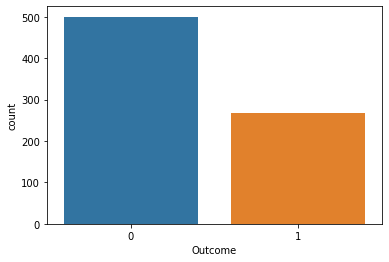

In [123]:
sns.countplot(x="Outcome", data=dataset)

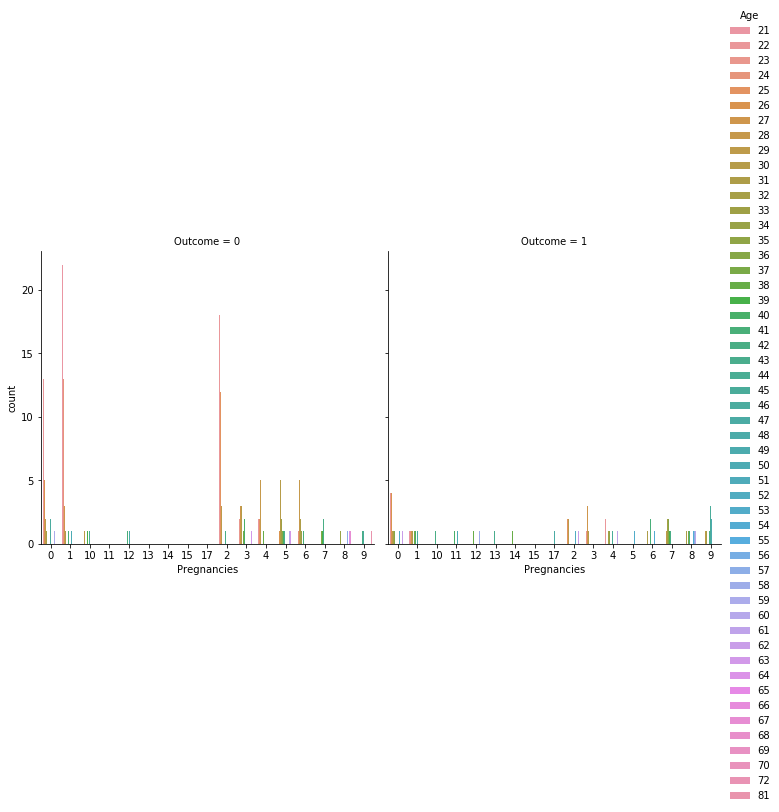

In [124]:
sns.catplot(x ='Pregnancies', hue ='Age',  
kind ='count', col ='Outcome', data = dataset) 

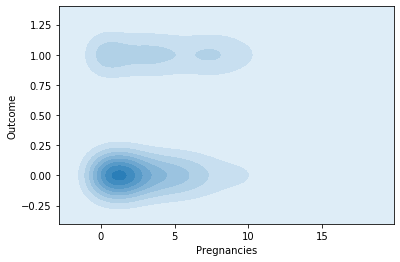

In [125]:
sns.kdeplot(dataset['Pregnancies'], data2=dataset['Outcome'], shade=True)

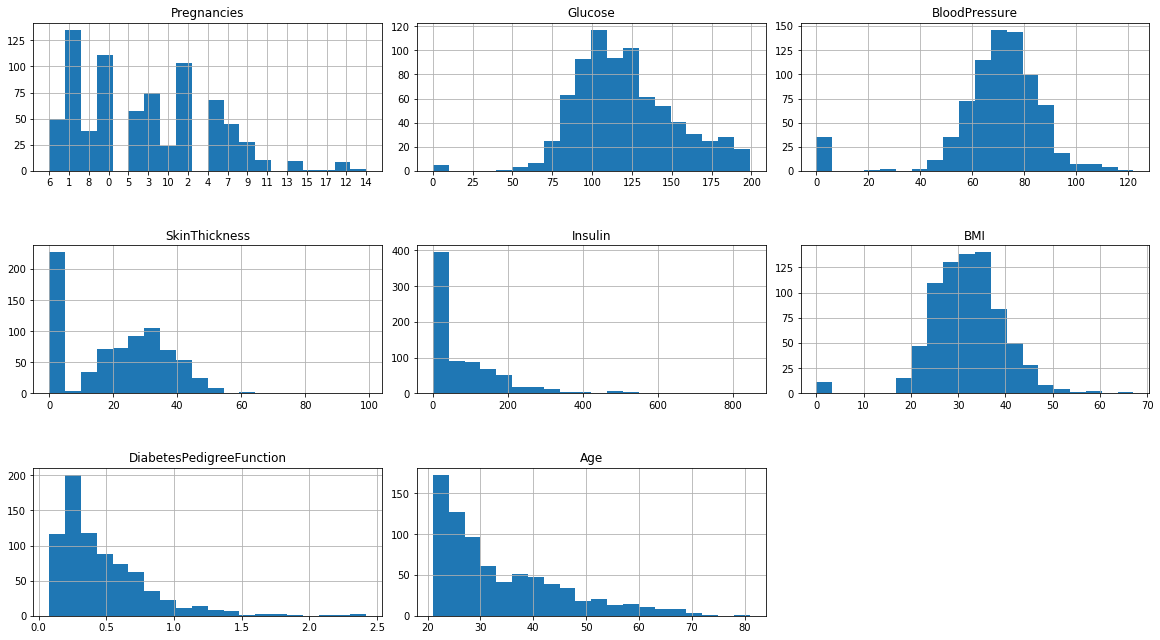

In [50]:
#Plotting histogram for each column
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

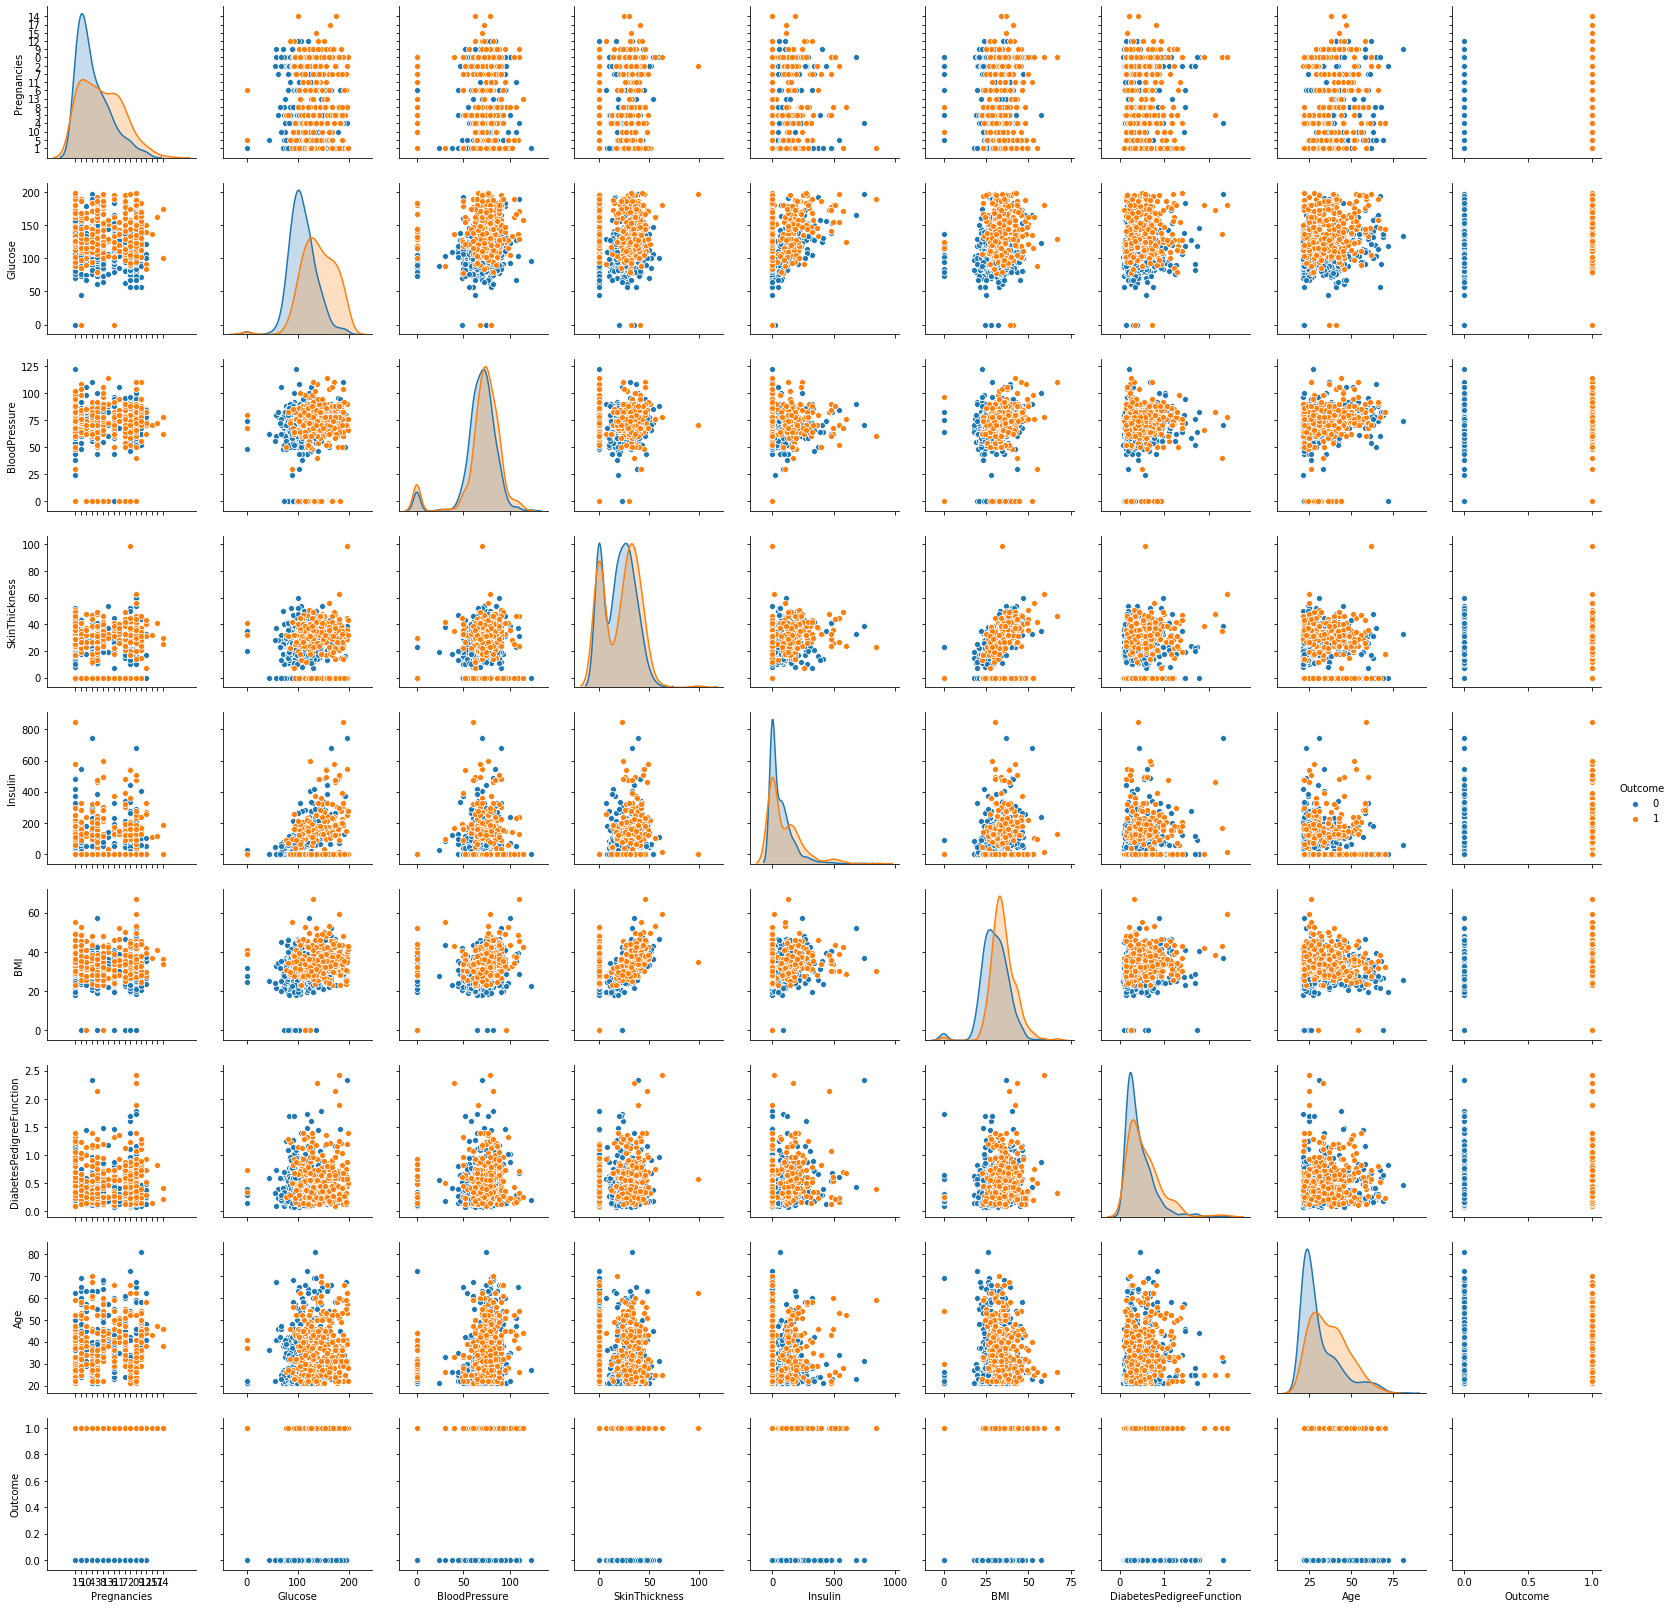

In [51]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

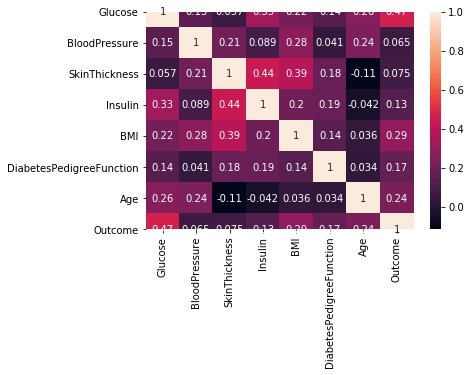

In [52]:
#Heatmap correlation to find best correlated features
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [53]:
#creating new dataset for further implementation
dataset_new = dataset

In [60]:
dataset_new[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [61]:
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [63]:
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [64]:
#Feature selection using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [65]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [67]:
X = dataset_scaled.iloc[:, [0, 1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [68]:
#Spliting data 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [69]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 5)
X_test shape: (154, 5)
Y_train shape: (614,)
Y_test shape: (154,)


In [93]:
########################### Logistic Regression ###############

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
Y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 70.77922077922078


In [126]:
print("Confusion Matrix")
metrics.confusion_matrix(Y_test, Y_pred_logreg)

Confusion Matrix


array([[83, 17],
       [28, 26]], dtype=int64)

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_logreg)

In [129]:
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 70.77922077922078


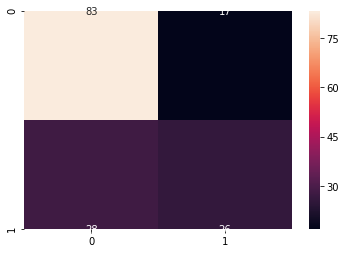

In [128]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [130]:

############################# KNN Algorithm ############

In [131]:


# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [98]:
Y_pred_knn = knn.predict(X_test)

In [99]:
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

In [100]:
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 73.37662337662337


In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[84, 16],
       [25, 29]], dtype=int64)

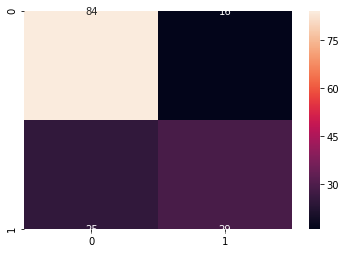

In [133]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
######################### Super Vector Machine ###############

In [101]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [102]:
Y_pred_svc = svc.predict(X_test)

In [103]:
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)

In [104]:
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 70.12987012987013


In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_svc)
cm

array([[82, 18],
       [28, 26]], dtype=int64)

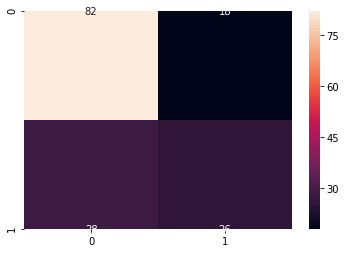

In [135]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
###################### Decision Tree Classifier Algorithm#####################3

In [105]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [107]:
Y_pred_dectree = dectree.predict(X_test)

In [108]:
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)

In [109]:
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)

In [110]:
print("Decision tree: " + str(accuracy_dectree * 100))

Decision tree: 69.48051948051948


In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dectree)
cm

array([[79, 21],
       [26, 28]], dtype=int64)

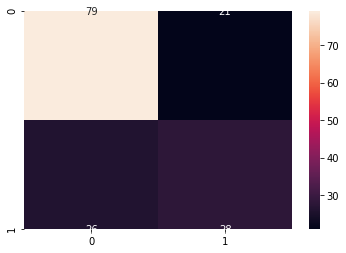

In [137]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
######################### Random Forrest Classifier ##########

In [111]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
Y_pred_ranfor = ranfor.predict(X_test)

In [113]:
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [114]:
print("Random Forest: " + str(accuracy_ranfor * 100))

Random Forest: 75.32467532467533


In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[85, 15],
       [23, 31]], dtype=int64)

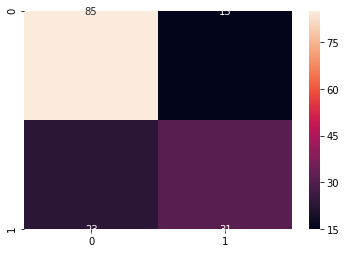

In [139]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [140]:
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 70.77922077922078
K Nearest neighbors: 73.37662337662337
Support Vector Classifier: 70.12987012987013
Decision tree: 69.48051948051948
Random Forest: 75.32467532467533


In [ ]:
# Best model i got is Random forrest with higher accuracy 75.32